In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip "/content/drive/MyDrive/ZIP/archive.zip"

Streaming output truncated to the last 5000 lines.
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0001.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0002.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0003.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0004.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0005.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0006.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0007.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0008.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0009.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0010.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0011.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0012.png  
  inflating: leapgestrecog/leapGestRe

In [ ]:
!cp -r "/content/leapgestrecog/leapGestRecog" '/content/drive/MyDrive/Data_deeplearning'

In [ ]:
import os
a = "/content/drive/MyDrive/Data_deeplearning/leapGestRecog/09/01_palm"
path, dirs, files =next(os.walk(a))
f=len(files)
print(f)

StopIteration: ignored

In [ ]:
!nvidia-smi

Thu Oct 19 07:07:05 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8    12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
lookup = dict()
reverselookup = dict()
count = 0
for j in os.listdir('/content/drive/MyDrive/Data_deeplearning/leapGestRecog/00'):
    if not j.startswith('.'):
        lookup[j] = count
        reverselookup[count]=j
        count +=1
lookup

{'01_palm': 0,
 '02_l': 1,
 '03_fist': 2,
 '04_fist_moved': 3,
 '05_thumb': 4,
 '06_index': 5,
 '07_ok': 6,
 '08_palm_moved': 7,
 '09_c': 8,
 '10_down': 9}

In [ ]:
x_data = []
y_data = []
datacount = 0
for i in range(3,10):
    for j in os.listdir('/content/drive/MyDrive/Data_deeplearning/leapGestRecog/0'+str(i)+'/'):
        if not j.startswith('.'):
            count = 0
            for k in os.listdir('/content/drive/MyDrive/Data_deeplearning/leapGestRecog/0'+str(i)+'/'+j+'/'):
                img = Image.open('/content/drive/MyDrive/Data_deeplearning/leapGestRecog/0'+str(i)+'/'+j+'/'+k).convert('L')
                img = img.resize((320,120))
                arr = np.array(img)
                x_data.append(arr)
                count +=1
            y_values = np.full((count,1),lookup[j])
            y_data.append(y_values)
            datacount += count
x_data = np.array(x_data, dtype='float32')
y_data = np.array(y_data)
y_data = y_data.reshape(datacount,1)

In [ ]:
y_data.shape

(14000, 1)

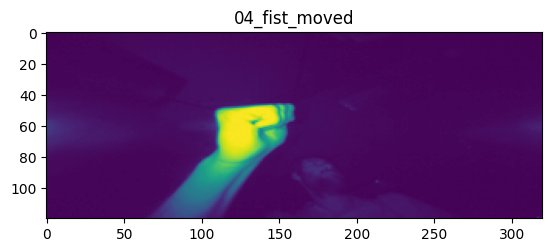

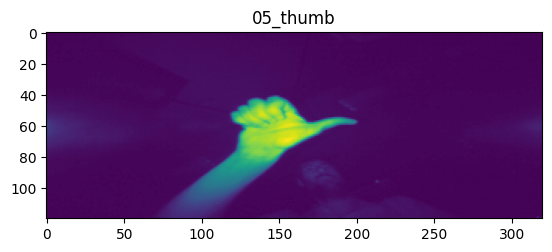

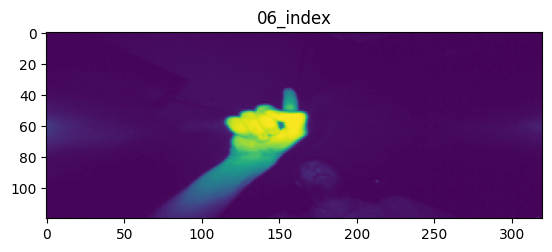

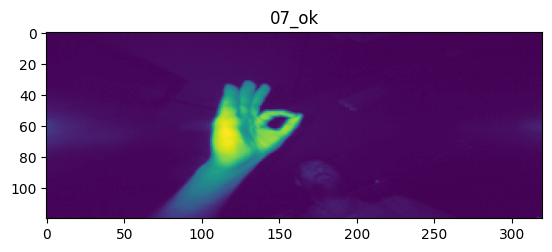

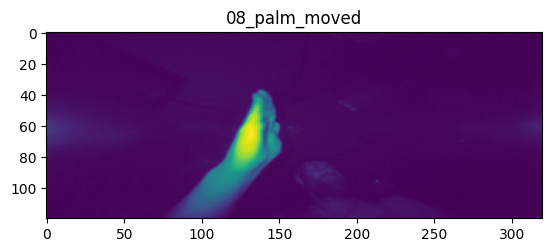

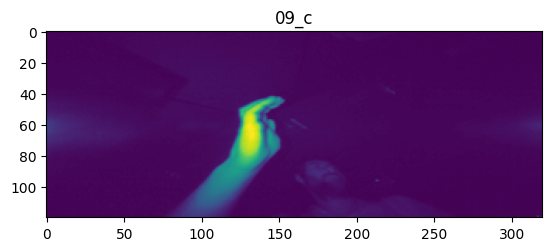

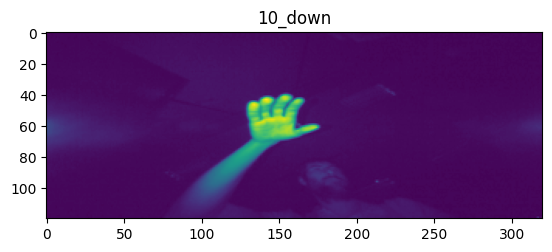

In [ ]:
from random import randint
for i in range(3,10):
    plt.imshow(x_data[i*200,:,:])
    plt.title(reverselookup[y_data[i*200,0]])
    plt.show()

In [ ]:
y_data.shape

(14000, 1)

In [ ]:

import keras
from keras.utils import to_categorical
y_data = to_categorical(y_data)

In [ ]:
x_data = x_data.reshape((datacount,120,320,1))
x_data/=255

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_further, y_train, y_further = train_test_split(x_data, y_data, test_size=0.2)
x_validate, x_test, y_validate, y_test = train_test_split(x_further, y_further, test_size=0.5)

In [ ]:
from keras import layers, models

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32,(5,5), strides=(2,2),activation='relu',input_shape=(120,320,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3, batch_size=64, verbose=1, validation_data=(x_validate, y_validate))

Epoch 1/3
175/175 [==============================] - 17s 28ms/step - loss: 0.3827 - accuracy: 0.8779 - val_loss: 0.0097 - val_accuracy: 0.9971
Epoch 2/3
175/175 [==============================] - 3s 19ms/step - loss: 0.0102 - accuracy: 0.9974 - val_loss: 0.0030 - val_accuracy: 0.9979
Epoch 3/3
175/175 [==============================] - 3s 18ms/step - loss: 0.0019 - accuracy: 0.9996 - val_loss: 7.5809e-04 - val_accuracy: 0.9993


In [ ]:
print(x_train.shape,x_test.shape)

(11200, 120, 320, 1) (1400, 120, 320, 1)


In [ ]:
[loss, acc] = model.evaluate(x_test,y_test,verbose=1)
print("Accuracy:" + str(acc))

44/44 [==============================] - 0s 9ms/step - loss: 4.3797e-04 - accuracy: 1.0000
Accuracy:1.0


In [ ]:
model.predict(x_test)

44/44 [==============================] - 0s 5ms/step


array([[9.47786072e-10, 8.43198289e-11, 9.99999404e-01, ...,
        6.02021467e-16, 4.56880584e-12, 7.46912920e-10],
       [2.31690382e-08, 7.79810023e-07, 9.99999166e-01, ...,
        1.04291787e-14, 5.12469787e-13, 6.65053477e-17],
       [6.97971281e-09, 6.97167324e-10, 2.98918326e-06, ...,
        9.28549460e-10, 2.85686114e-10, 1.12464171e-07],
       ...,
       [1.11397451e-08, 5.15036125e-10, 7.04992748e-12, ...,
        9.99997616e-01, 1.82300619e-10, 9.09323894e-10],
       [1.61796876e-07, 9.55917498e-11, 5.79679948e-09, ...,
        9.99999642e-01, 2.85116569e-10, 6.81104173e-10],
       [5.59197515e-15, 7.62222739e-19, 3.58813814e-08, ...,
        2.61151886e-12, 1.12304995e-20, 1.00000000e+00]], dtype=float32)

In [ ]:
y_pred = model.predict(x_test)

44/44 [==============================] - 0s 5ms/step


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, y_pred.round())

1.0

In [ ]:
model.save("handmove.h5")